# to speed up training time, this code should be run using the gpu runtime
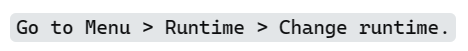

## Load Required Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

## Gathering Dataset

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip /content/cats_and_dogs_filtered.zip

--2024-01-14 10:23:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   130MB/s    in 0.5s    

2024-01-14 10:23:02 (130 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation

In [ ]:
PATH = "cats_and_dogs_filtered"
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (224,224)

## Simple Exploration

In [ ]:
train_dogs_path = os.path.join(train_dir, 'dogs')
train_cats_path = os.path.join(train_dir, 'cats')
train_dogs = os.listdir(train_dogs_path)
train_cats = os.listdir(train_cats_path)

### Train Dogs

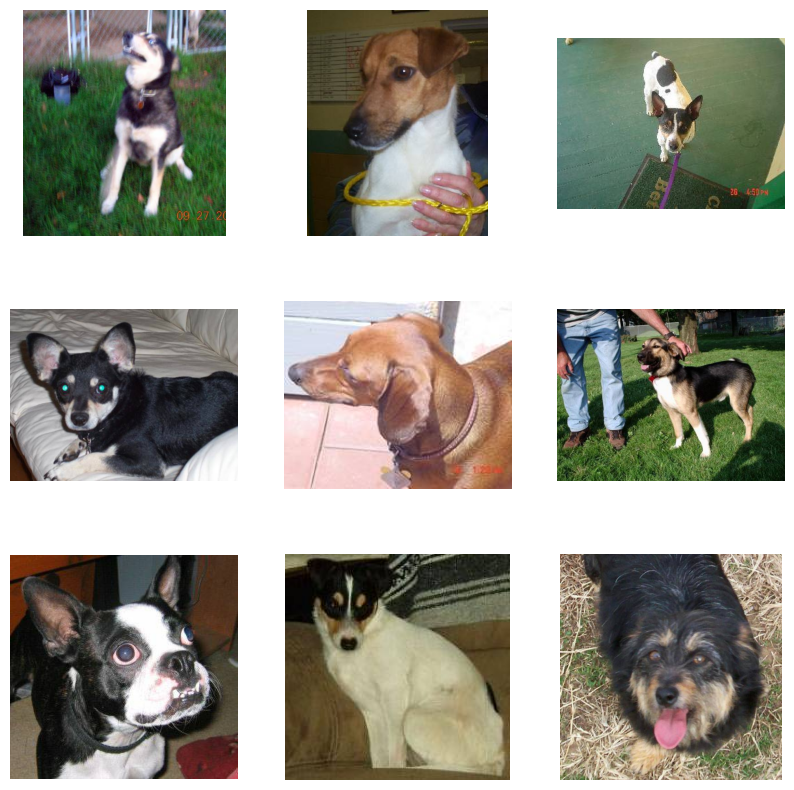

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  image_path = os.path.join(train_dogs_path, train_dogs[i])
  ax = plt.subplot(3, 3, i+1)
  image = tf.keras.preprocessing.image.load_img(image_path)
  plt.imshow(image)
  plt.axis('off')

### Train Cats

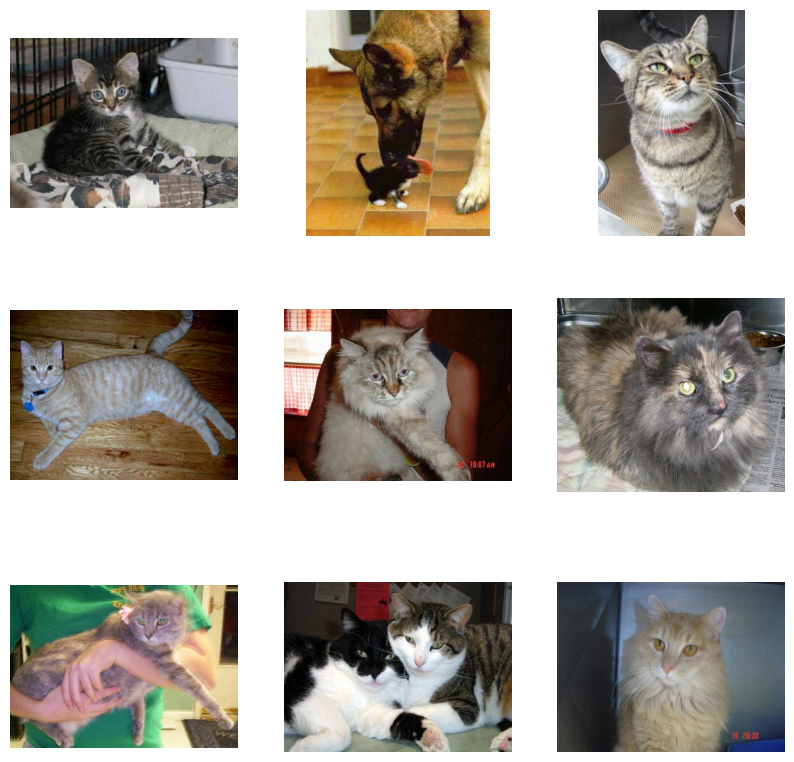

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  image_path = os.path.join(train_cats_path, train_cats[i])
  ax = plt.subplot(3, 3, i+1)
  image = tf.keras.preprocessing.image.load_img(image_path)
  plt.imshow(image)
  plt.axis('off')

## Data Preprocessing

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224)
)

Found 2000 files belonging to 2 classes.


In [ ]:
validation = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(224,224)
)

Found 1000 files belonging to 2 classes.


In [ ]:
for image, label in train.take(1):
  print(image[0].shape)
  print(label[0])

(224, 224, 3)
tf.Tensor(1, shape=(), dtype=int32)


## Modelling

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(7,7)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 128)       401536    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

In [ ]:
model.fit(
    train,
    validation_data=validation,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 17s 151ms/step - loss: 95.1098 - binary_accuracy: 0.5495 - val_loss: 4.3231 - val_binary_accuracy: 0.6030
Epoch 2/10
63/63 [==============================] - 6s 84ms/step - loss: 2.1151 - binary_accuracy: 0.6900 - val_loss: 2.1281 - val_binary_accuracy: 0.6240
Epoch 3/10
63/63 [==============================] - 7s 103ms/step - loss: 0.7369 - binary_accuracy: 0.8140 - val_loss: 2.1371 - val_binary_accuracy: 0.6240
Epoch 4/10
63/63 [==============================] - 6s 83ms/step - loss: 0.3008 - binary_accuracy: 0.9015 - val_loss: 1.7117 - val_binary_accuracy: 0.6380
Epoch 5/10
63/63 [==============================] - 6s 94ms/step - loss: 0.0843 - binary_accuracy: 0.9685 - val_loss: 1.7398 - val_binary_accuracy: 0.6560
Epoch 6/10
63/63 [==============================] - 5s 79ms/step - loss: 0.0555 - binary_accuracy: 0.9795 - val_loss: 1.5943 - val_binary_accuracy: 0.6490
Epoch 7/10
63/63 [==============================] - 7s 100ms/step 

In [ ]:
model.evaluate(validation)

32/32 [==============================] - 1s 34ms/step - loss: 1.6129 - binary_accuracy: 0.6540


[1.612898349761963, 0.6539999842643738]

## Add Augmentation

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range= 1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range = 0.01,
    zoom_range = 0.01,
    fill_mode = 'constant',
)

In [ ]:
train = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='binary'
)

validation = datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


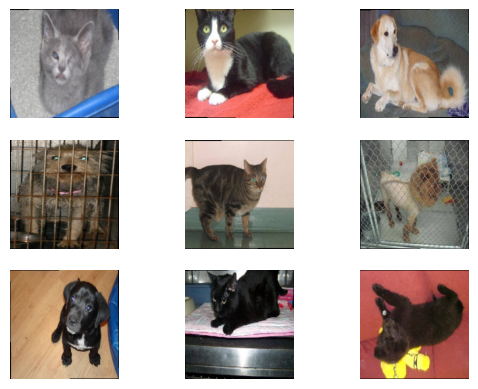

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = train.next()
  image = batch[0][0]
  plt.imshow(image)
  plt.axis('off')

# # show the figure
# plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(7,7), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(9,9), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

In [ ]:
model.fit(
    train,
    validation_data=validation,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 43s 606ms/step - loss: 0.7020 - binary_accuracy: 0.5010 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 35s 565ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 37s 579ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 36s 566ms/step - loss: 0.6932 - binary_accuracy: 0.4950 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 37s 587ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 37s 589ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 37s 58

## Transfer Learning

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224, 3),
    include_top=False,
    weights='imagenet',
    classes=2
)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                2007072   
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4265089 (16.27 MB)
Trainable params: 2007105 (7.66 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

In [ ]:
model.fit(
    train,
    validation_data=validation,
    epochs=5
)

Epoch 1/10
63/63 [==============================] - 42s 608ms/step - loss: 0.8212 - binary_accuracy: 0.8900 - val_loss: 0.5777 - val_binary_accuracy: 0.9200
Epoch 2/10
63/63 [==============================] - 37s 584ms/step - loss: 0.2690 - binary_accuracy: 0.9260 - val_loss: 0.1450 - val_binary_accuracy: 0.9500
Epoch 3/10
63/63 [==============================] - 38s 611ms/step - loss: 0.1363 - binary_accuracy: 0.9390 - val_loss: 0.1390 - val_binary_accuracy: 0.9550
Epoch 4/10
63/63 [==============================] - 37s 587ms/step - loss: 0.0942 - binary_accuracy: 0.9655 - val_loss: 0.1455 - val_binary_accuracy: 0.9500
Epoch 5/10
63/63 [==============================] - 37s 584ms/step - loss: 0.0933 - binary_accuracy: 0.9595 - val_loss: 0.1858 - val_binary_accuracy: 0.9440
Epoch 6/10
63/63 [==============================] - 36s 582ms/step - loss: 0.0785 - binary_accuracy: 0.9670 - val_loss: 0.1574 - val_binary_accuracy: 0.9490
Epoch 7/10
63/63 [==============================] - 36s 58

### More about Transfer Learning

In [ ]:
base_model.trainable= True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_29 (Flatten)        (None, 62720)             0         
                                                                 
 dense_45 (Dense)            (None, 32)                2007072   
                                                                 
 dense_46 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4265089 (16.27 MB)
Trainable params: 3868545 (14.76 MB)
Non-trainable params: 396544 (1.51 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

In [ ]:
model.fit(
    train,
    validation_data=validation,
    epochs=5
)

Epoch 1/5
63/63 [==============================] - 53s 687ms/step - loss: 0.7784 - binary_accuracy: 0.7840 - val_loss: 2.4380 - val_binary_accuracy: 0.7530
Epoch 2/5
63/63 [==============================] - 49s 787ms/step - loss: 0.4277 - binary_accuracy: 0.9220 - val_loss: 0.5444 - val_binary_accuracy: 0.8800
Epoch 3/5
63/63 [==============================] - 41s 652ms/step - loss: 0.4147 - binary_accuracy: 0.9080 - val_loss: 0.6305 - val_binary_accuracy: 0.8660
Epoch 4/5
63/63 [==============================] - 40s 634ms/step - loss: 0.4028 - binary_accuracy: 0.9315 - val_loss: 4.8012 - val_binary_accuracy: 0.7690
Epoch 5/5
63/63 [==============================] - 38s 599ms/step - loss: 0.3717 - binary_accuracy: 0.9400 - val_loss: 5.7192 - val_binary_accuracy: 0.7880


## Plot model

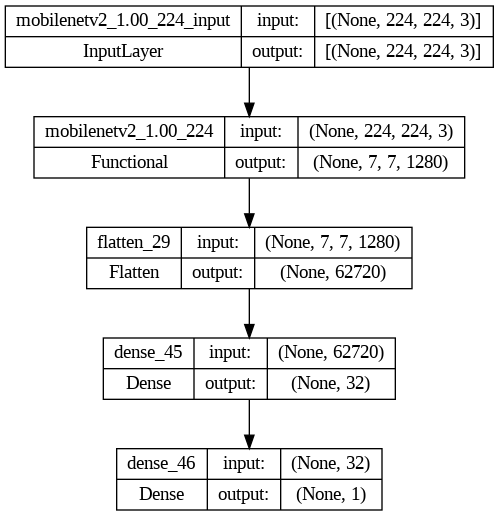

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)